# Introduction

This worksheet focuses on Neural Networks. You will:

- Implement your own version of a Single Layer Perceptron (SLP) to understand the underlying mechanics, and compare it with an equivalent implementation built using `PyTorch`.

- Build and train Multi‑Layer Perceptrons (MLPs) in `PyTorch` for both classification and regression tasks, exploring how to design, configure, and optimise these neural network models.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a function %matplotlib inline to display plots in the worksheet.

In [1]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt

# 1. Single Layer Perceptron
In this question, you will build and train a single‑layer perceptron using PyTorch to make predictions on the breast cancer dataset.
This is a binary classification task where the goal is to classify each instance as malignant or benign based on 30 numerical features extracted from medical images.

In this question, you will:

(a) Load the breast cancer dataset from  `sklearn` and store the features and targets in suitable variables.\
(b) Separate your data into a training and test split.\
(c) (Optional) Write your own function to implement Single Layer Perceptron.\
(d) Implement Single Layer Perceptron in `PyTorch` (e.g., a single `nn.Linear` layer with a `sigmoid` output).\
    Train your PyTorch perceptron on the training data using an appropriate loss function and an optimizer.\
(e) Evaluate the performance of both models on the test data using appropriate metrics (e.g., accuracy, precision).     
(f) Plot the confusion matrix to visualise the performance of your model.

## Part (a)  
Import the package `datasets` from `sklearn` and then load the load_breast_cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`.  
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).  
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?  

In [2]:
#TODO: import suitable packages, load the dataset, and save data and targets into variables X and Y
import sklearn.datasets as datasets

df = datasets.load_breast_cancer()
X = df.data
y = df.target

## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [3]:
# TODO: import the package train_test_split from sklearn.model_selection.
from sklearn.model_selection import train_test_split

# Split the dataset into Xtr, Xtest, Ytr, Ytest
Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, random_state=10)  ##TODO##

Perceptrons are very sensitive to feature scale. Standardise your input data by applying `StandardScaler` from `sklearn.preprocessing` to both the training set (`Xtr`) and the test set (`Xtest`).

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xtest = scaler.transform(Xtest)

## (Optional) Part (c)  
Recall from the lecture that a single-layer perceptron runs as follows:  

**Training step**:  
- For each training datapoint $(\vec{x}_i)$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x}_i + b)$.  
  - Pass $(z)$ through the activation function (sigmoid function in this case) to get the predicted class $(y_{\text{pred}})$.  
  - Compute the error as $(e = y_i - y_{\text{pred}})$, where $(y_i)$ is the true label.  
  - Update the weights and bias using the perceptron learning rule:  
    $[
    \vec{w} \gets \vec{w} + \eta \cdot e \cdot \vec{x}_i  
    ]  
    [
    b \gets b + \eta \cdot e
    ]$  
  Here, $(\eta)$ is the learning rate.  

**Prediction step**:  
- For a given datapoint $(\vec{x})$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x} + b)$.  
  - Pass $(z)$ through the step function to obtain the class prediction.  

Write function(s) to implement the training and prediction steps. Y

In [5]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, iterat):
        #TODO# initialise the weights to random values and set the bias to 0
        self.weights = np.random.rand(input_size) ##TODO## (HINT: use np.random.rand())
        self.bias = 0  ##TODO## 
        self.learning_rate = learning_rate
        self.iterat = iterat

    def activation(self, z):
        #TO DO # Write a function to implement the **sigmoid activation function**. 
        sigmoid = 1 / (1 + np.exp(-z))
        return sigmoid  ##TODO## 
   
    def train(self, X, y):
        for epoch in range(self.iterat):
            for i in range(X.shape[0]):
                # Calculate the linear combination
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)

                #TODO# Calculate error between target and predicted values
                error = y[i] - y_pred  ##TODO## 

                #TODO# update the weights and bias according to the above equations
                self.weights += self.learning_rate * error * X[i]  ##TODO##
                self.bias += self.learning_rate * error  ##TODO##

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

#Train the perceptron
input_size = Xtr.shape[1] # To pass the number of features
perceptron1 = SingleLayerPerceptron(input_size=input_size, learning_rate=0.01, iterat=10)

##TODO##  #Train the perceptron with the Train data
perceptron1.train(Xtr, Ytr)

#Test the perceptron
my_y_pred_prob = perceptron1.predict(Xtest)  ##TODO##
my_Ypred = (my_y_pred_prob >= 0.5).astype(int).flatten()

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score( my_Ypred, Ytest)

0.9649122807017544

## Part (d) Perceptron in PyTorch
In this step, you will build a simple neural network model that implements a single‑layer perceptron in PyTorch. A perceptron consists of one fully‑connected (linear) layer that computes a weighted sum of the inputs, followed by an activation function that maps this value to a predicted class. For binary classification, we apply a sigmoid activation, which converts the linear output into a probability between 0 and 1.

### Fully-connected layer
A fully‑connected layer connects every input feature to every output unit. In PyTorch, this is implemented using the `nn.Linear` class, which performs the linear transformation  $(z = \vec{w} \cdot \vec{x}_i + b)$ before the activation function is applied.

Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

### Activation Functions
PyTorch does not include activation functions inside `nn.Linear`, so they must be added explicitly. For a perceptron used in binary classification, we apply `torch.sigmoid()` to the output of the linear layer. This produces a probability that can be thresholded to obtain a class label.

Forward Pass
In PyTorch, the `forward()` method defines how data flows through the model. Inputs are passed through the linear layer, then through the activation function, and the final output is returned. This computation graph determines how gradients are calculated during training.

Let's import necessary libraries

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
class PerceptronTorch(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
        

After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use binary cross‑entropy loss, which is the standard loss function for binary classification tasks such as logistic regression. The module `nn.BCELoss()` expects the model to output probabilities (after a sigmoid), so we do not need to implement any additional activation inside the loss function.

Binary cross entropy Loss: https://docs.pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a smaller number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

The cell below defines a training function for our classifier. 

In [21]:
model = PerceptronTorch(input_dim=Xtr.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

We need to convert our data into PyTorch‑compatible tensors so the model can train on it. PyTorch cannot operate directly on NumPy arrays — it requires tensors, which are optimized for automatic differentiation and efficient computation on both CPUs and GPUs.

In [22]:
Xtr_t = torch.tensor(Xtr, dtype=torch.float32)
Ytr_t = torch.tensor(Ytr, dtype=torch.float32).view(-1, 1)

Xtest_t = torch.tensor(Xtest, dtype=torch.float32)

### Train the Perceptron 

This training loop does the following:

- Runs for a fixed number of epochs so the model repeatedly sees the training data.
- Performs a forward pass on the training set to compute predictions.
- Calculates the training loss and stores it for plotting.
- Backpropagates the error and updates the model’s weights using the optimizer.
- Evaluates the model on the test set (in eval mode and without gradients).
- Records the validation loss to track generalisation.

Plots both curves so you can compare training vs. validation loss over time.

**TO-DO:**  Train the network for 30 epochs and plot the losses by completing the cell below. At which epoch did we get the best model fit? How could we use the dev set losses to return the best model? Remember that neural networks tend to overfit if trained too long, as they have many parameters and are very flexible. 

Note that the answer can vary each time you run the training process due to random initialisation of the model weights and shuffling of the dataset. 

ANSWER
   * The plot shows the best fit around ... epochs before it starts to overfit, as the validation loss converges while training loss goes down 
   * If dev set loss stops going down for a long time, but training set loss keeps decreasing, the model may be overfitting.
   * We can stop training at the point where dev set loss stops decreasing 
   * Or we could save the model with best dev set performance and use that model to make predictions.

Epoch 1/num_epochs, Loss: 0.5262
Epoch 2/num_epochs, Loss: 0.4835
Epoch 3/num_epochs, Loss: 0.4459
Epoch 4/num_epochs, Loss: 0.4130
Epoch 5/num_epochs, Loss: 0.3841
Epoch 6/num_epochs, Loss: 0.3587
Epoch 7/num_epochs, Loss: 0.3364
Epoch 8/num_epochs, Loss: 0.3165
Epoch 9/num_epochs, Loss: 0.2989
Epoch 10/num_epochs, Loss: 0.2831
Epoch 11/num_epochs, Loss: 0.2688
Epoch 12/num_epochs, Loss: 0.2560
Epoch 13/num_epochs, Loss: 0.2444
Epoch 14/num_epochs, Loss: 0.2338
Epoch 15/num_epochs, Loss: 0.2241
Epoch 16/num_epochs, Loss: 0.2153
Epoch 17/num_epochs, Loss: 0.2072
Epoch 18/num_epochs, Loss: 0.1998
Epoch 19/num_epochs, Loss: 0.1930
Epoch 20/num_epochs, Loss: 0.1867
Epoch 21/num_epochs, Loss: 0.1809
Epoch 22/num_epochs, Loss: 0.1755
Epoch 23/num_epochs, Loss: 0.1706
Epoch 24/num_epochs, Loss: 0.1660
Epoch 25/num_epochs, Loss: 0.1618
Epoch 26/num_epochs, Loss: 0.1579
Epoch 27/num_epochs, Loss: 0.1542
Epoch 28/num_epochs, Loss: 0.1508
Epoch 29/num_epochs, Loss: 0.1477
Epoch 30/num_epochs, Lo

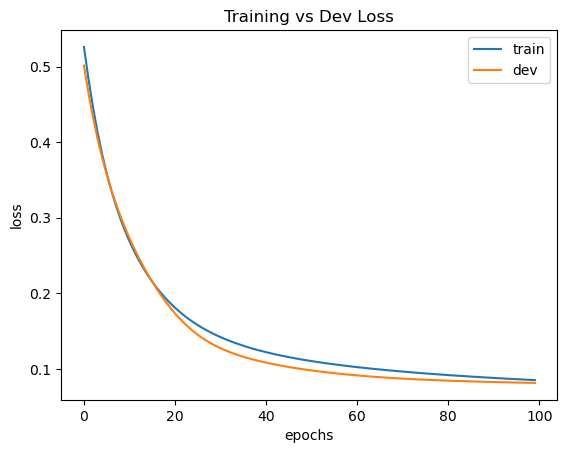

In [23]:
num_epochs = 100
train_losses = []
dev_losses = []

### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # forward pass
    outputs = model(Xtr_t)
    loss = criterion(outputs, Ytr_t)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/num_epochs, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model.eval()
    with torch.no_grad():
        dev_out = model(Xtest_t)
        dev_loss = criterion(dev_out, torch.tensor(Ytest, dtype=torch.float32).view(-1,1))
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

### Predict on Test Data
Now we can run the model in evaluation mode, generate predicted probabilities for the test set, and convert those probabilities into binary class labels by applying a 0.5 threshold.

In [24]:
with torch.no_grad():
    y_pred_prob = model(Xtest_t)
    Y_pred = (y_pred_prob >= 0.5).float().numpy().flatten()

## Part (e) 
Use the built in metrics in sklearn to calculate the accuracy of both classifiers on the Testing set.

In [25]:
from sklearn.metrics import accuracy_score

##TODO## Write your answer here
#Evaluate the accuracy
accuracy_score(Y_pred, Ytest)

0.9824561403508771

If the accuracy is low, consider increasing the maximum number of iterations and repeating the fitting and testing process.

## Part(f) 
Plot the confusion matrix to visualise the performance of your model.

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
##TODO## Write your answer here
confusion_matrix(Ytest, Y_pred)

array([[38,  1],
       [ 1, 74]], dtype=int64)

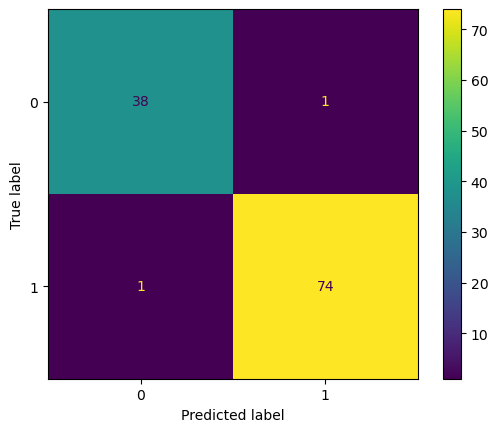

In [30]:
ConfusionMatrixDisplay.from_predictions(Ytest, Y_pred)

# 2. Multilayer Perceptron

<img src="https://raw.githubusercontent.com/ematm0067/2025_26/6e01ac01c1e0e85ad7e89176a16e8facc13a199a/worksheets/source/Picture1.png" width="600" />

The input layer, located on the far left, contains neurons that correspond to the input features. Each neuron in the hidden layer processes the values from the previous layer through a weighted sum, which is then passed through a non-linear activation function, such as `ReLU`. Finally, the output layer takes the values from the last hidden layer and converts them into the model’s output.

# 2.1. Multi‑class Classification using a Multilayer Perceptron
Now that you’ve compared your Perceptron implementation with the torch Perceptron for binary classification, you will extend your work to a multiclass classification task using the load_digits dataset.
This dataset contains 8×8 grayscale images of handwritten digits (0–9), represented as 64 numerical pixel‑intensity features.

In this task, you will implement a Multilayer Perceptron (MLP) using PyTorch.

(a) Load the dataset
Use `sklearn.datasets.load_digits()` to obtain the feature matrix and target labels.
Store them in appropriate variables.

(b) Split the data
Use train_test_split to divide the dataset into training and test sets.
Convert both splits into PyTorch tensors or wrap them in TensorDataset + DataLoader.

(c) Build and train a PyTorch MLP
Create a neural network with at least:
- an input layer
- one or more hidden layers (choose `relu` as activation function)
- an output layer of size 10 (one per digit class)


Train the model for several epochs and record the training loss.

(d) Evaluate your model’s performance on the test set (e.g., accuracy, precision).  
(e) Modify your hyperparameters.  

## Part (a)  
From `sklearn.datasets` load the load_digits dataset (function is `load_digits()`). Save the data into a variable `X1` and the targets into a variable `Y1`.  
Take a look at the data in `X1`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`). 
Take a look at the targets. How many classes does the output need to be classified into??  
Look at the values of `X1`. Does the data need to be normalised?

In [31]:
#TODO#  #Load the dataset
digits = datasets.load_digits() ##TODO##
X1 = digits.data  ##TODO##
Y1 = digits.target  ##TODO##

Look at the images corresponding to the input. Set the value of the target as the output.

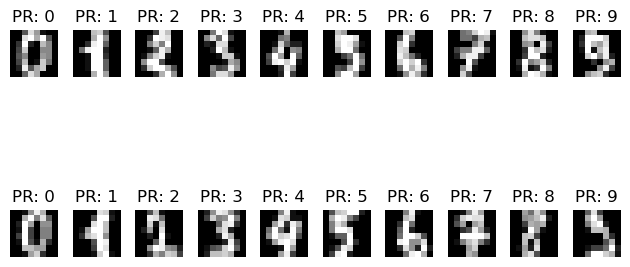

In [32]:
fig, axes = plt.subplots(2, 10)
for i in range(20):
    axes[i//10, i %10].imshow(digits.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"PR: {digits.target[i]}")
    
plt.tight_layout()
plt.show()


## Part (b)  
Split the dataset into training and testing sets

In [33]:
##TODO##
Xtr1, Xtest1, Ytr1, Ytest1 = train_test_split(X1, Y1, test_size=0.2, random_state=10)  ##TODO##

## Part (c) 
Define a multilayer perceptron (MLP) with two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should produce the output. Use `nn.Sequential` to connect the layers and implement the forward pass.

In [34]:
class MLP_Class(nn.Module):
    def __init__(self, input_dim, hidden=10, output_dim=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, output_dim)  
        )

    def forward(self, x):
        return self.model(x)


Set up the MLP by specifying the input size, number of output classes, and the hidden layer sizes. Then create the model and prepare it for training by choosing an appropriate loss function (CrossEntropyLoss for multi‑class classification) and an optimizer (Adam with a learning rate of 0.01).

In [35]:
input_dim = Xtr1.shape[1]
output_dim = len(torch.unique(torch.tensor(Ytr1)))
hidden_layer_sizes=10
model1 = MLP_Class(input_dim, hidden_layer_sizes, output_dim)

criterion1 = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [36]:
Xtr_t1 = torch.tensor(Xtr1, dtype=torch.float32)
Ytr_t1 = torch.tensor(Ytr1, dtype=torch.long)
Ytest_t1 = torch.tensor(Ytest1, dtype=torch.long)

Xtest_t1 = torch.tensor(Xtest1, dtype=torch.float32)

Identify the epoch at which the validation loss stops decreasing.

Epoch 1/num_epochs, Loss: 2.7572
Epoch 2/num_epochs, Loss: 2.3214
Epoch 3/num_epochs, Loss: 2.3092
Epoch 4/num_epochs, Loss: 2.3039
Epoch 5/num_epochs, Loss: 2.2938
Epoch 6/num_epochs, Loss: 2.2863
Epoch 7/num_epochs, Loss: 2.2752
Epoch 8/num_epochs, Loss: 2.2579
Epoch 9/num_epochs, Loss: 2.2292
Epoch 10/num_epochs, Loss: 2.1872
Epoch 11/num_epochs, Loss: 2.1383
Epoch 12/num_epochs, Loss: 2.0895
Epoch 13/num_epochs, Loss: 2.0477
Epoch 14/num_epochs, Loss: 2.0080
Epoch 15/num_epochs, Loss: 1.9618
Epoch 16/num_epochs, Loss: 1.9070
Epoch 17/num_epochs, Loss: 1.8498
Epoch 18/num_epochs, Loss: 1.7954
Epoch 19/num_epochs, Loss: 1.7402
Epoch 20/num_epochs, Loss: 1.6835
Epoch 21/num_epochs, Loss: 1.6290
Epoch 22/num_epochs, Loss: 1.5798
Epoch 23/num_epochs, Loss: 1.5325
Epoch 24/num_epochs, Loss: 1.4817
Epoch 25/num_epochs, Loss: 1.4247
Epoch 26/num_epochs, Loss: 1.3624
Epoch 27/num_epochs, Loss: 1.2989
Epoch 28/num_epochs, Loss: 1.2367
Epoch 29/num_epochs, Loss: 1.1756
Epoch 30/num_epochs, Lo

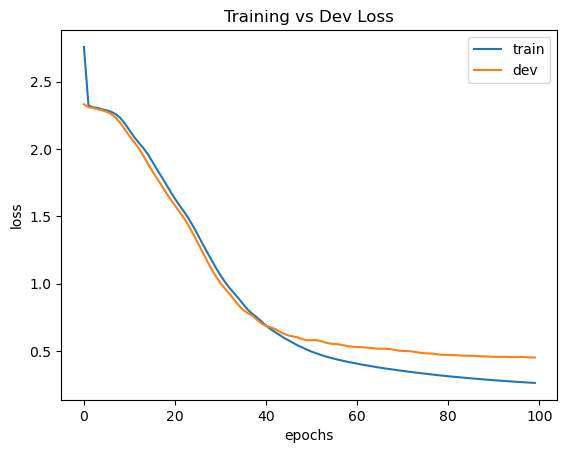

In [37]:
num_epochs = 100  #TODO#
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model1.train()
    optimizer1.zero_grad()

    # forward pass
    outputs = model1(Xtr_t1)
    loss = criterion1(outputs, Ytr_t1)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer1.step()
    print(f"Epoch {epoch+1}/num_epochs, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model1.eval()
    with torch.no_grad():
        dev_out = model1(Xtest_t1)
        dev_loss = criterion1(dev_out, Ytest_t1)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()

plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

### Predict on Test Data
Run the model in evaluation mode, compute the output logits for the test set, and convert these logits into class predictions by taking the index of the largest value (the class with the highest score). Then compare these predicted class labels with the true labels to calculate the model’s accuracy.

In [43]:
with torch.no_grad():
    logits = model1(Xtest_t1)
    Y_pred1 = torch.argmax(logits, dim=1).numpy()
    
##TODO##
accuracy_mlp1 = accuracy_score(Ytest_t1, Y_pred1) ##TODO##
print(f"Accuracy of MLP: {accuracy_mlp1 * 100:.2f}%")
print("Classification Report :\n", Y_pred1)

print("Confusion Matrix:\n", confusion_matrix(Ytest_t1, Y_pred1))

Accuracy of MLP: 86.11%
Classification Report :
 [5 2 5 4 8 2 4 8 3 0 8 7 0 1 8 6 8 7 9 7 1 8 6 7 8 1 5 2 9 9 3 3 7 3 4 1 9
 2 5 4 2 1 0 3 2 3 6 1 9 4 4 8 8 4 1 5 8 7 1 0 4 9 8 4 7 9 0 7 6 3 9 3 3 8
 0 7 3 6 5 2 0 8 1 0 1 1 2 8 8 8 2 6 3 4 7 3 8 2 9 2 5 0 8 0 4 8 8 0 6 7 3
 3 7 1 2 4 6 0 8 8 1 1 7 8 5 5 2 3 3 2 7 6 2 5 4 3 3 8 6 7 2 7 4 9 9 4 9 8
 6 1 1 1 4 0 8 9 1 2 3 7 0 3 4 1 5 6 9 3 5 6 4 0 8 6 7 0 9 9 4 7 9 5 2 0 6
 7 5 3 8 7 1 3 2 8 3 3 1 7 1 1 1 7 1 6 4 6 9 5 2 3 5 2 9 5 4 8 2 5 1 5 6 2
 3 9 0 2 0 2 1 0 5 0 6 4 2 2 9 0 5 0 6 9 4 4 5 4 5 6 1 8 7 0 8 6 2 0 1 2 3
 8 4 4 3 5 7 9 7 2 0 2 0 9 2 8 6 3 1 0 6 6 6 7 1 6 1 7 6 0 6 3 7 4 6 2 7 0
 8 4 7 3 3 0 0 2 3 8 7 4 6 7 5 7 6 0 9 6 2 7 1 5 6 5 6 4 2 2 7 1 6 6 6 7 0
 2 9 9 7 9 6 7 0 8 3 5 9 4 8 5 5 4 7 3 9 2 7 3 3 6 4 3]
Confusion Matrix:
 [[35  0  0  0  0  1  1  0  0  0]
 [ 0 29  1  0  1  1  1  0  1  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 37  0  0  0  0  1  1]
 [ 0  0  0  0 30  0  2  0  2  0]
 [ 0  0  1  0  0 23  1  3  0  4]
 [ 

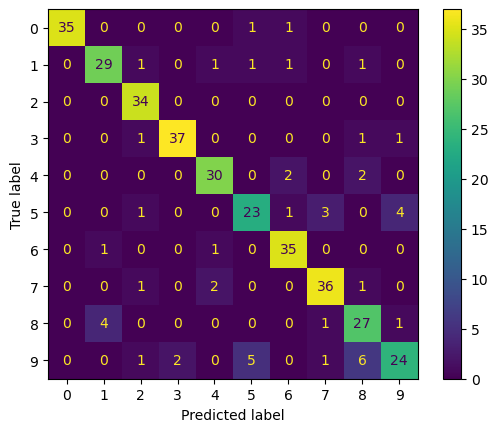

In [52]:
ConfusionMatrixDisplay.from_predictions(Ytest_t1, Y_pred1)

Visualize a sample of images and their predictions for MLP. Check if it is correct.

In [48]:
##TODO##

(360, 360, 360)

## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

# 2.2. Regression Using a Multilayer Perceptron in PyTorch
In this section, you will build and train a Multilayer Perceptron (MLP) in PyTorch to perform a regression task on the `load_diabetes` dataset. The goal is to predict a continuous target value representing diabetes progression, using 10 numerical input features.

In this task, you will:  
(a) Load the dataset using `load_diabetes` from `sklearn.datasets`.  
(b) Split the data into training and test sets.  
(c) Build and train a regression MLP in PyTorch using fully connected layers and an appropriate activation function (e.g., ReLU).  
(d) Evaluate the model’s performance on the test set using regression metrics such as Mean Squared Error (MSE) and R² score.  
(e) Experiment with different hyperparameters (hidden layer sizes, learning rate, number of epochs) to improve performance.  
(f) Plot predicted vs. actual values to visualise how well the model fits the data.

## Part (a)
Load the load_diabetes from sklearn.datasets
Check the X and y of your data
Take a look at the data in `X2` and the target labels in `Y2`. Find their shapes using `.shape`. 
- How many data points are there in `X2`?
- How many features does each data point have?
- Does the data require scaling or normalising before training a neural network model?

In [ ]:
#TODO# Load dataset
[X2,Y2]=##TODO##

## Part (b) 
Split the data into training and testing sets

In [ ]:
##TODO## Split dataset
Xtr2, Xtest2, Ytr2, Ytest2 = ##TODO##

In [ ]:
scaler_X = StandardScaler()
Xtr2 = scaler_X.fit_transform(Xtr2)
Xtest2 = scaler_X.transform(Xtest2)

scaler_Y = StandardScaler()
Ytr2 = scaler_Y.fit_transform(Ytr2.reshape(-1,1))
Ytest2 = scaler_Y.transform(Ytest2.reshape(-1,1))

## Part (c)
Define a multilayer perceptron (MLP) for a regression task using two hidden layers. Each hidden layer should apply a linear transformation followed by a ReLU activation, and the final linear layer should output a single continuous value. Use `nn.Sequential` to connect the layers and implement the forward pass. The final layer should output a single value for regression.

In [ ]:
class MLP_Reg(nn.Module):
    def __init__(self, input_dim, hidden=10):
        super().__init__()
        self.model = nn.Sequential(
        ###TODO## Create the MLP Regressor model
        )

    def forward(self, x):
        return self.model(x)


Set up the MLP by specifying the input size, the hidden layer sizes, and an output size of 1 for continuous regression. Then create the model and prepare it for training by selecting a suitable loss function for regression (such as `nn.MSELoss()`)

In [ ]:
input_dim = Xtr2.shape[1]
hidden_layer_sizes=##TODO##
model2 = MLP_Reg(input_dim, hidden_layer_sizes)
criterion2 = ##TODO##
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

As before, we need to convert our data into PyTorch‑compatible tensors so the model can train on it. 

In [ ]:
Xtr_t2 = torch.tensor(Xtr2, dtype=torch.float32)
Ytr_t2 = torch.tensor(Ytr2, dtype=torch.float32).view(-1, 1)
Ytest_t2 = torch.tensor(Ytest2, dtype=torch.float32).view(-1, 1)
Xtest_t2 = torch.tensor(Xtest2, dtype=torch.float32)

Identify the epoch at which the validation loss stops decreasing.

In [ ]:
num_epochs=##TODO##
train_losses = []
dev_losses = []
    
### TRAINING LOOP WITH LOSS TRACKING ###
for epoch in range(num_epochs):
    model2.train()
    optimizer2.zero_grad()

    # forward pass
    outputs = model2(Xtr_t2)
    loss = criterion2(outputs, Ytr_t2)
    train_losses.append(loss.item())

    # backward + update
    loss.backward()
    optimizer2.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

    # compute dev/validation loss
    model2.eval()
    with torch.no_grad():
        dev_out = model2(Xtest_t2)
        dev_loss = criterion2(dev_out, Ytest_t2)
        dev_losses.append(dev_loss.item())

### PLOT ###
plt.figure()
plt.plot(train_losses, label='train')
plt.plot(dev_losses, label='dev')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title("Training vs Dev Loss")
plt.show()

## Part (d)
Make predictions on the test set (`Xtest2`).
Evaluate the model using appropriate metrics from `sklearn.metrics`.

In [ ]:
with torch.no_grad():
    y_pred2 = model2(Xtest_t2).numpy().flatten()

# TODO: Evaluate regression performance
from sklearn.metrics import mean_squared_error, r2_score
mse = #TODO##
r2 = ##TODO##
print(f"MSE of MLP: {mse:.4f}")
print(f"R² Score of MLP: {r2:.4f}")

## Part (e) Experimenting with Hyperparameters
Experiment with Hidden Layer Configurations

This neural network currently has 2 hidden layers, each with 10 neurons. This is defined using `nn.Linear layers`, for example:`nn.Linear(10, 10)`. 
- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

In PyTorch, you choose activation functions manually (e.g., `nn.ReLU()`, `nn.Tanh()`, `nn.Sigmoid()`).
- Change the activation function and observe how it impacts the model's performance.

In PyTorch, the learning rate is set in the optimizer.
- Investigate the Learning Rate. What does increasing or decreasing the value of learning_rate result in?

## Part (f)
Plot the predicted vs actual values
After training the `MLP_Reg` and predicting the outputs for `Xtest2`, create a scatter plot to compare the predicted values (`y_pred2`) against the actual values (`Ytest2`).

In [ ]:
# TODO# plot the predicted vs actual values